<a href="https://colab.research.google.com/github/YinterestingProjects/human-wildlife-interactions/blob/main/pyCaret_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook creates and automatically compares a bunch of different default classifiers

### Imports / Installs / Data Read Ins

In [ ]:
# uncomment and run if not installed already
# !pip install pycaret

In [ ]:
import pycaret
pycaret.__version__

'3.0.0'

In [ ]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# please edit this path to where you are storing the relevant data
path = '/content/drive/MyDrive/MADS_Capstone/data/classifier_video_data'

train = pd.read_csv(f'{path}/train_mat.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv(f'{path}/test_mat.csv').drop('Unnamed: 0', axis=1)
val = pd.read_csv(f'{path}/val_mat.csv').drop('Unnamed: 0', axis=1)


data = pd.concat([train, val], ignore_index=True)
data = train

### Default Classifiers on imbalanced data

In [ ]:
# import pycaret classification and init setup
random_seed = 42

from pycaret.classification import *
s = setup(data, target = '1152', session_id = random_seed)

,Description,Value
0,Session id,42
1,Target,1152
2,Target type,Binary
3,Original data shape,"(2794, 1153)"
4,Transformed data shape,"(2794, 1153)"
5,Transformed train set shape,"(1955, 1153)"
6,Transformed test set shape,"(839, 1153)"
7,Numeric features,1152
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

In [ ]:
baseline_model_results = pull()

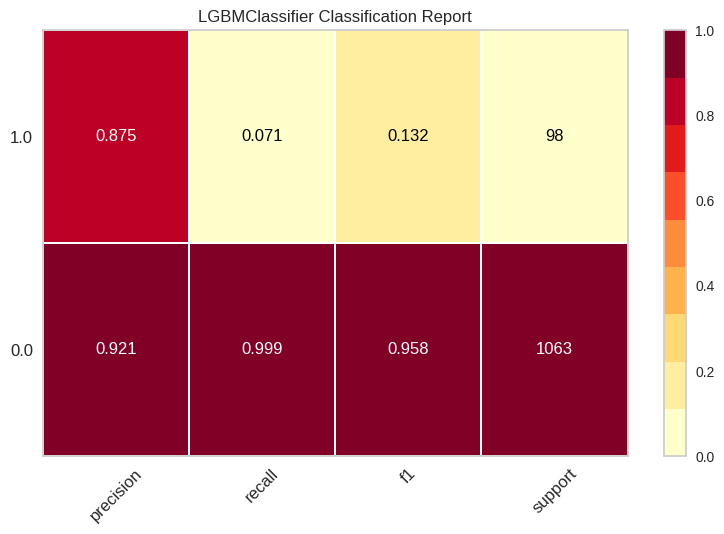

In [ ]:
# plot 
plot_model(best, plot = 'class_report')

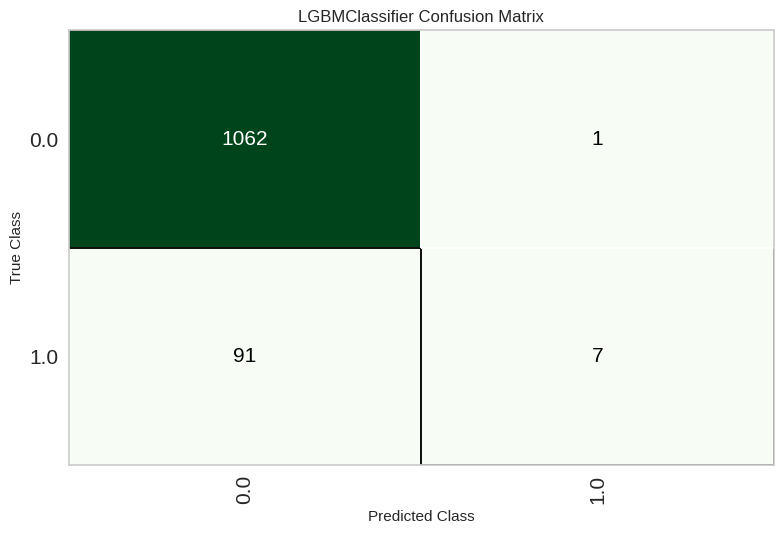

In [ ]:
# Plotting the confusion matrix
plot_model(best,plot='confusion_matrix')

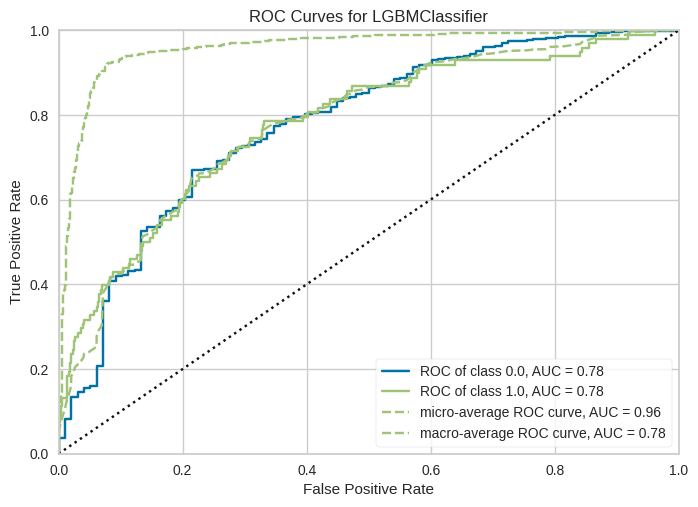

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

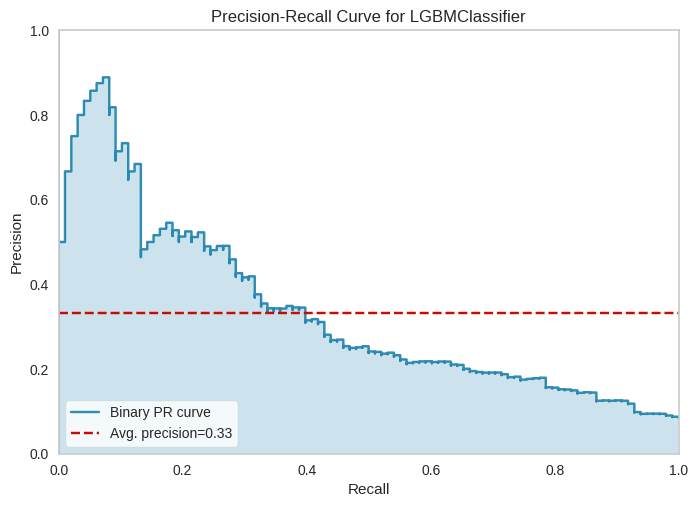

In [ ]:
plot_model(best, plot = 'pr')

### Default classifiers on SMOTE balanced data

In [ ]:
#fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

In [ ]:
s2 = setup(data, target = '1152', fix_imbalance=True, session_id = random_seed)

,Description,Value
0,Session id,42
1,Target,1152
2,Target type,Binary
3,Original data shape,"(3869, 1153)"
4,Transformed data shape,"(6121, 1153)"
5,Transformed train set shape,"(4960, 1153)"
6,Transformed test set shape,"(1161, 1153)"
7,Numeric features,1152
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_SMOTE = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9254,0.8354,0.2332,0.6894,0.3383,0.3097,0.3646,0.9390
xgboost,Extreme Gradient Boosting,0.9251,0.8495,0.3783,0.5779,0.4522,0.4149,0.4276,0.6830
lightgbm,Light Gradient Boosting Machine,0.9236,0.8521,0.3164,0.5762,0.4059,0.3695,0.3895,0.8080
rf,Random Forest Classifier,0.9217,0.8506,0.2510,0.5723,0.3425,0.3092,0.3410,0.7760
qda,Quadratic Discriminant Analysis,0.9158,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0320
dummy,Dummy Classifier,0.9158,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4910
gbc,Gradient Boosting Classifier,0.9095,0.8459,0.4520,0.4711,0.4580,0.4090,0.4109,0.6630
svm,SVM - Linear Kernel,0.8863,0.0000,0.3777,0.3346,0.3523,0.2906,0.2926,0.4910
lr,Logistic Regression,0.8829,0.8101,0.5002,0.3603,0.4163,0.3534,0.3608,0.9630
ada,Ada Boost Classifier,0.8527,0.7849,0.4951,0.2840,0.3598,0.2835,0.2983,1.4120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
SMOTE_results = pull()

### XGBoost

In [ ]:
# create an Extreme Gradient Boosting model
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9225,0.8545,0.4348,0.5556,0.4878,0.4466,0.4505
1,0.9151,0.8191,0.2609,0.5000,0.3429,0.3023,0.3206
2,0.9299,0.8387,0.4348,0.6250,0.5128,0.4764,0.4855
3,0.9151,0.7966,0.1739,0.5000,0.2581,0.2241,0.2598
4,0.9151,0.8303,0.3913,0.5000,0.4390,0.3939,0.3973
5,0.9041,0.7663,0.2609,0.4000,0.3158,0.2667,0.2737
6,0.9151,0.8845,0.2609,0.5000,0.3429,0.3023,0.3206
7,0.9410,0.8501,0.5652,0.6842,0.6190,0.5874,0.5905
8,0.9519,0.9426,0.5455,0.8000,0.6486,0.6238,0.6370


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9004,0.8434,0.5217,0.4286,0.4706,0.4162,0.4186
1,0.8413,0.7242,0.3043,0.2059,0.2456,0.1606,0.1645
2,0.9151,0.8347,0.6522,0.5000,0.5660,0.5199,0.5256
3,0.8930,0.7383,0.3913,0.3750,0.3830,0.3244,0.3245
4,0.8782,0.7482,0.5652,0.3611,0.4407,0.3761,0.3880
5,0.8708,0.7670,0.4348,0.3125,0.3636,0.2939,0.2989
6,0.8782,0.8443,0.3478,0.3077,0.3265,0.2599,0.2605
7,0.9041,0.8541,0.6522,0.4545,0.5357,0.4841,0.4939
8,0.9074,0.9329,0.7727,0.4595,0.5763,0.5280,0.5506


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
def ploting(model, train=False):
  plot_model(model, plot='confusion_matrix', use_train_data=train)
  plot_model(model, plot = 'class_report', use_train_data=train)
  plot_model(model, plot='confusion_matrix', use_train_data=train)
  plot_model(model, plot = 'auc', use_train_data=train)
  plot_model(model, plot = 'pr', use_train_data=train)

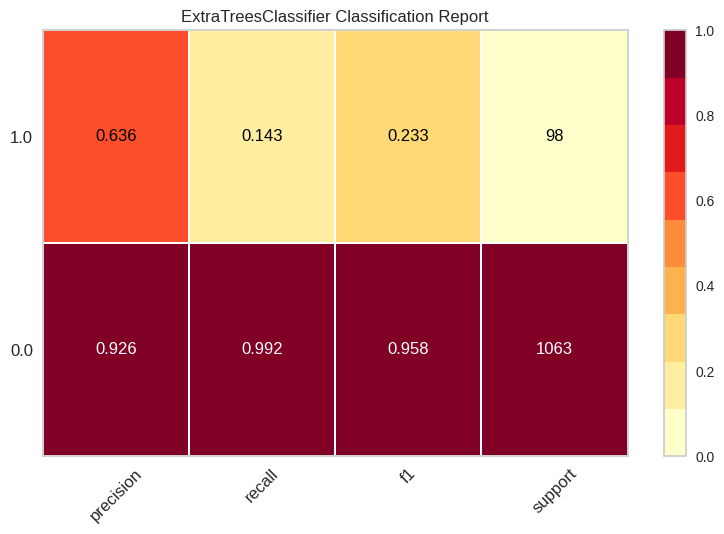

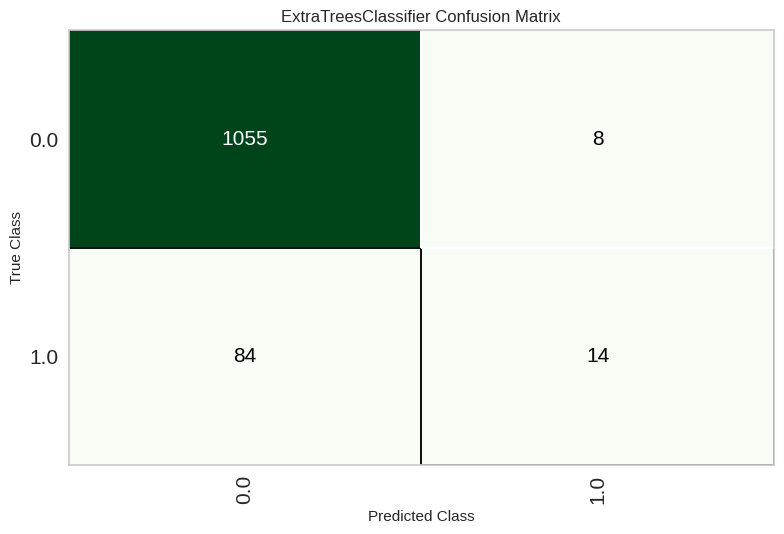

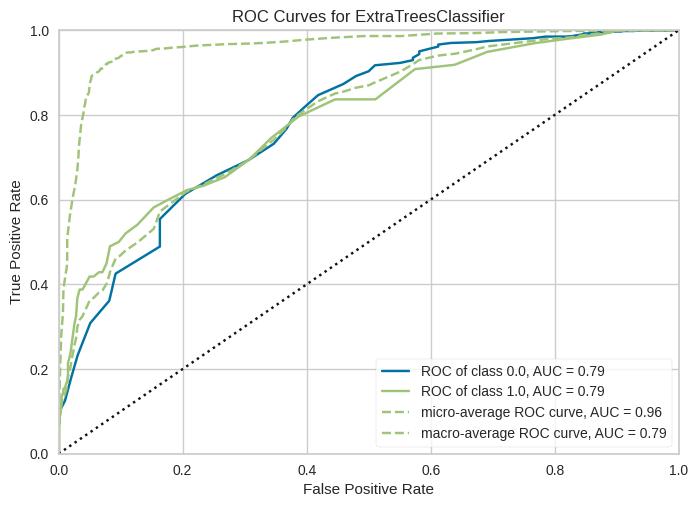

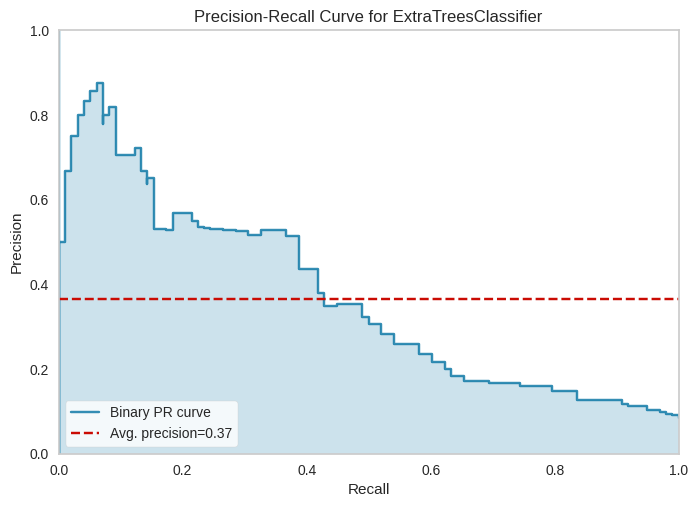

In [ ]:
plot_model(best_SMOTE, plot = 'class_report')
plot_model(best_SMOTE, plot='confusion_matrix')
plot_model(best_SMOTE, plot = 'auc')
plot_model(best_SMOTE, plot = 'pr')

In [ ]:
# uncomment and run this if you did not run the previous training cell
# and want to speed up the process by creating the default
# xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9184,0.7510,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9082,0.8482,0.0000,0.0000,0.0000,-0.0097,-0.0221
2,0.9235,0.8810,0.1765,0.7500,0.2857,0.2613,0.3402
3,0.9133,0.8199,0.0588,0.5000,0.1053,0.0886,0.1491
4,0.9184,0.8863,0.1765,0.6000,0.2727,0.2429,0.2951
5,0.9179,0.8142,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9179,0.8666,0.0625,0.5000,0.1111,0.0946,0.1550
7,0.9179,0.7713,0.1875,0.5000,0.2727,0.2387,0.2713
8,0.9179,0.7196,0.0625,0.5000,0.1111,0.0946,0.1550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
preds = xgboost.predict(test.iloc[:, :-1])
y_test = test.iloc[:, -1]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds)
xgboost_score = xgboost.score(test.iloc[:, :-1], y_test)
roc_auc = roc_auc_score(y_test, preds)

print("Classifier: XGBoost")
print("Class 0 Precision:  {}  |  Class 1 Precision: {}".format(precision[0], precision[1]))
print("Class 0 Recall:     {}  |  Class 1 Recall:    {}".format(recall[0], recall[1]))
print("Class 0 FScore:     {}  |  Class 1 FScore:    {}".format(fscore[0], fscore[1]))
print("Class 0 Support:    {}  |  Class 1 Support:   {}".format(support[0], support[1]))
print("XGBoost Accuracy Score: {}".format(xgboost_score))
print("XGBoost ROC/AUC Score:  {}".format(roc_auc))
print(confusion_matrix(y_test,preds))

Classifier: XGBoost
Class 0 Precision:  0.9280701754385965  |  Class 1 Precision: 0.7272727272727273
Class 0 Recall:     0.9943609022556391  |  Class 1 Recall:    0.16326530612244897
Class 0 FScore:     0.9600725952813067  |  Class 1 FScore:    0.26666666666666666
Class 0 Support:    532  |  Class 1 Support:   49
XGBoost Accuracy Score: 0.9242685025817556
XGBoost ROC/AUC Score:  0.578813104189044
[[529   3]
 [ 41   8]]
